In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['figure.figsize'] =(5,3) 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size='10')


In [15]:
# Función que devuelve estado base dado Delta/J=delta_J y un número aleatorio r.
def EstadoBase(delta_J, r): 
    beta = 89./144.
    n_sites = 144
    phi = 2.*np.pi*r
    Ham = -np.eye(n_sites,n_sites,1)-np.eye(n_sites,n_sites,-1)
    for i in np.arange(n_sites):
        Ham[i,i] = delta_J * np.cos(2.*np.pi*i*beta + phi)
    Ham[0,n_sites-1] = -1
    Ham[n_sites-1,0]=-1
    w, v = np.linalg.eigh(Ham)    # w son los eigenvalores en orden ascendente. v[:,i] son los eigenvectores 
                                  # correspondientes
    return v[:,0]

# Función que devuelve todos los estado propios de H dado Delta/J=delta_J y un número aleatorio r.
def Estados(delta_J, r):
    beta = 89./144.
    n_sites = 144
    phi = 2.*np.pi*r
    Ham = -np.eye(n_sites,n_sites,1)-np.eye(n_sites,n_sites,-1)
    for i in np.arange(n_sites):
        Ham[i,i] = delta_J * np.cos(2.*np.pi*i*beta + phi)
    Ham[0,n_sites-1] = -1
    Ham[n_sites-1,0]=-1
    w, v = np.linalg.eigh(Ham)  ### w ares the eignevalues in ascending order, v[:,i] are the corresponding eigenvectors
    return v

# Función que calcula IPR dado un estado
def IPR(estado):
    ipr=0.
    for i in np.arange(np.size(estado)):
        ipr += estado[i]**4
    return ipr


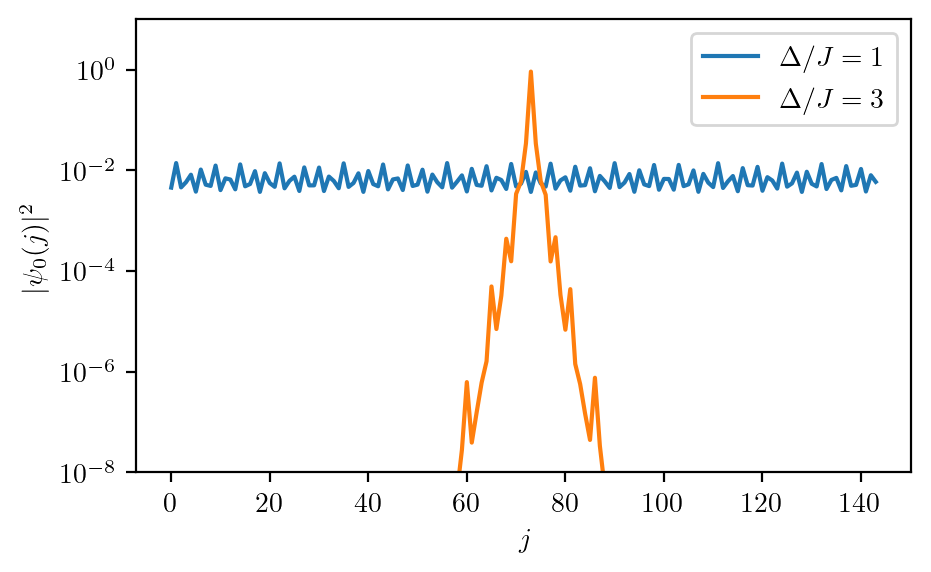

In [21]:
ebase=EstadoBase(1,np.random.rand())
ebase2=EstadoBase(3,np.random.rand())
plt.plot(ebase**2, label ="$\Delta/J=1$")
plt.plot(ebase2**2, label ="$\Delta/J=3$")
plt.xlabel("$j$")
plt.ylabel("$|\psi_0(j)|^2$")
plt.yscale("log")
plt.ylim([1e-8,10])
plt.legend()
plt.show()




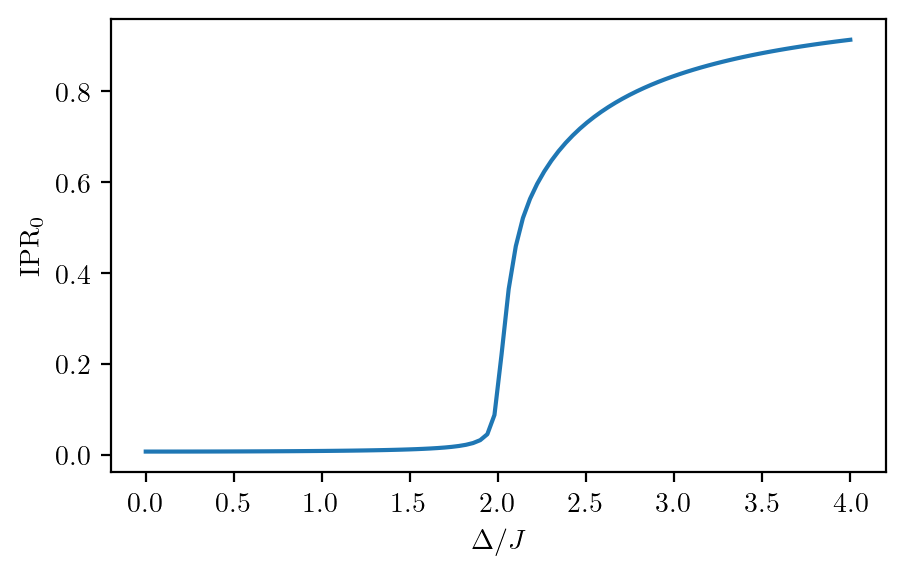

In [17]:
No_points=100
vec_Delta_J=np.linspace(0,4,No_points)
vec_Prom_IPR = np.empty(No_points)
No_realizaciones = 20
vec_r = np.random.rand(No_realizaciones)
for i in np.arange(No_points):
    sum_ipr=0.
    for j in np.arange(No_realizaciones):
        ebase=EstadoBase(vec_Delta_J[i], vec_r[j])
        sum_ipr += IPR(ebase)
    vec_Prom_IPR[i] = sum_ipr/No_realizaciones 
    
plt.plot(vec_Delta_J,vec_Prom_IPR)
plt.xlabel("$\Delta/J$")
plt.ylabel("$\mathrm{IPR}_0$")
plt.show()



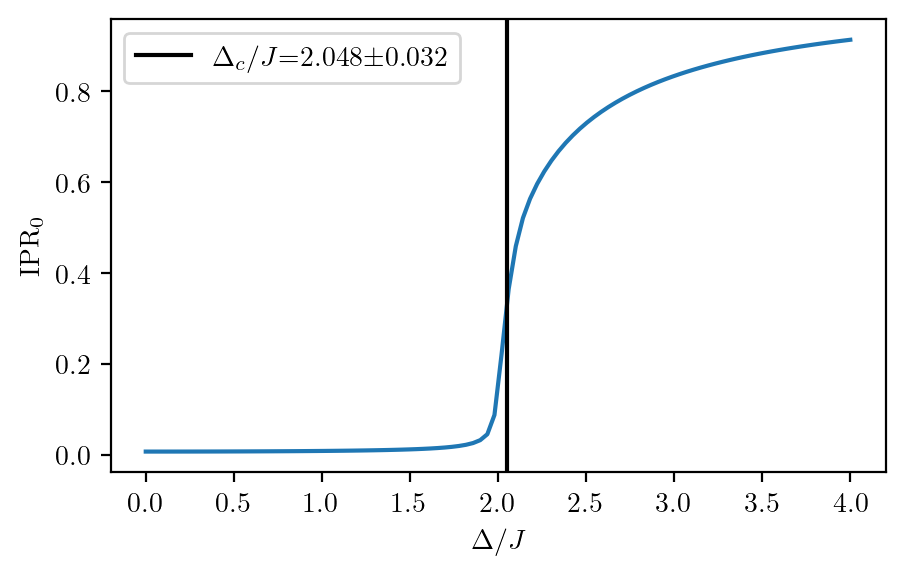

In [18]:
No_points=100
vec_Delta_J=np.linspace(0,4,No_points)
h = vec_Delta_J[1]
ipr=np.empty(No_points)
sum_Pc=0. 
sum_Pc_square=0.
for j in np.arange(No_realizaciones):
    for i in np.arange(No_points):   
        ipr[i] = IPR(EstadoBase(vec_Delta_J[i],vec_r[j]))
    second_derivate=np.empty(No_points-2)
    second_derivate[0]=0.0001
    for k in np.arange(1,No_points-2):
            second_derivate[k]=(ipr[k] +  ipr[k+2] -2.*ipr[k+1] )/(h**2)
            if np.sign(second_derivate[k])!=np.sign(second_derivate[k-1]):
                sum_Pc += vec_Delta_J[k+1]               
                sum_Pc_square += (vec_Delta_J[k+1])**2
                break
Prom_Pc=sum_Pc/No_realizaciones
Desv_Pc=np.sqrt(sum_Pc_square/No_realizaciones - Prom_Pc**2)

plt.plot(vec_Delta_J,vec_Prom_IPR)
plt.xlabel("$\Delta/J$")
plt.ylabel("$\mathrm{IPR}_0$")
plt.axvline(x = Prom_Pc, color = 'k', label = '$\Delta_c/J$='+ "{0:.3f}".format(Prom_Pc)+ "$\pm$" + "{0:.3f}".format(Desv_Pc) )
plt.legend()
plt.show()

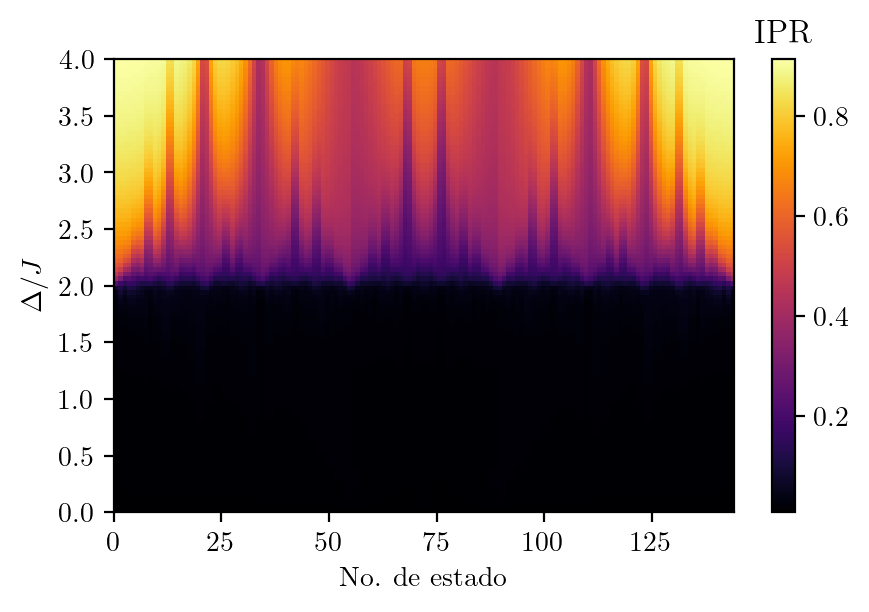

In [19]:
No_points=100
n_sites=144
vec_Delta_J=np.linspace(0,4,No_points)
Prom_IPR = np.empty((No_points,n_sites))
No_realizaciones = 20
vec_r = np.random.rand(No_realizaciones)
for i in np.arange(No_points):
    sum_ipr=np.zeros(n_sites)
    for j in np.arange(No_realizaciones):
        estados=Estados(vec_Delta_J[i], vec_r[j])        
        for k in np.arange(n_sites):
            sum_ipr[k] += IPR(estados[:,k])
    Prom_IPR[i,:] = sum_ipr/No_realizaciones 
    
plt.imshow(Prom_IPR,aspect='auto',extent=[0,n_sites,0,4],cmap="inferno",origin='lower')
plt.xlabel("No. de estado")
plt.ylabel("$\Delta/J$")
bar=plt.colorbar()
bar.ax.set_title('IPR')
plt.show()
